In [1391]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


In [1392]:
df = pd.read_csv("train.csv")

In [1393]:
df.shape

(1460, 81)

In [1394]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1395]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1397]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

by looking at all the columns, we can see that there are few columns which have more than 70% Null/NA Values. but they are part of the segregation of the data set and cannot be considered as NA/Null and be removed.

1.   PoolQC           1453 - NA Part of the data
2.   Fence            1179 - NA Part of the data
3.   MiscFeature      1406 - NA Part of the data
4.   Alley            1369 - NA Part of the data

In the same way, we will be going deep dive into checking each individual feature and accordingly take appropriate action.

In [1398]:
df.columns[df.isnull().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

Data Inspection:

While we did check describe, Data Type and Null Values, lets take a deeper look into understanding each of the variables and accordingly work on them.

In [1399]:
def stats(col): 

  print("data type is ", df[col].dtype)
  print("Value Count\n", df[col].value_counts())
  print("Describe\n",df[col].describe(percentiles = [.1, .25, .50, .75,.9,1]))
  print("Null/NA Value ", df[col].isnull().sum())

In [1400]:
stats(col = "MSSubClass")

data type is  int64
Value Count
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Describe
 count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
10%        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
90%       120.000000
100%      190.000000
max       190.000000
Name: MSSubClass, dtype: float64
Null/NA Value  0


In [1401]:
stats(col = "MSZoning")

data type is  object
Value Count
 RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Describe
 count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
Null/NA Value  0


In [1402]:
stats(col = "LotFrontage")

data type is  float64
Value Count
 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
Describe
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
10%        44.000000
25%        59.000000
50%        69.000000
75%        80.000000
90%        96.000000
100%      313.000000
max       313.000000
Name: LotFrontage, dtype: float64
Null/NA Value  259


As the above data is positive skewed and which have 259 missing values, we will replace them with Median values.

In [1403]:
df.LotFrontage.fillna(df.LotFrontage.median(), inplace = True)
df.LotFrontage.isnull().sum()

0

In [1404]:
stats(col = "PoolQC")

# As NA value has a significance as per the data set, we will assign NA as is.

data type is  object
Value Count
 Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
Describe
 count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object
Null/NA Value  1453


In [1405]:
df.PoolQC.fillna("NA", inplace = True)

In [1406]:
""" 
99% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
df.PoolQC.value_counts()

NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

In [1407]:
stats(col = "Fence")

# As NA value has a significance as per the data set, we will assign NA as is.

data type is  object
Value Count
 MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
Describe
 count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object
Null/NA Value  1179


In [1408]:
df.Fence.fillna("NA", inplace = True)

In [1409]:
""" 
81% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
df.Fence.value_counts()

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [1410]:
stats(col = "MiscFeature")

# As NA value has a significance as per the data set, we will assign NA as is.

data type is  object
Value Count
 Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
Describe
 count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object
Null/NA Value  1406


In [1411]:
df.MiscFeature.fillna("NA", inplace = True)

In [1412]:
""" 
96% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
df.MiscFeature.value_counts()

NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [1413]:
stats(col = "Alley")

# As NA value has a significance as per the data set, we will assign NA as is.

data type is  object
Value Count
 Grvl    50
Pave    41
Name: Alley, dtype: int64
Describe
 count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
Null/NA Value  1369


In [1414]:
df.MiscFeature.fillna("NA", inplace = True)

In [1415]:
""" 
93% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
df.MiscFeature.value_counts()

NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [1416]:
stats(col = "LotArea")

data type is  int64
Value Count
 7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: LotArea, Length: 1073, dtype: int64
Describe
 count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
10%        5000.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
90%       14381.700000
100%     215245.000000
max      215245.000000
Name: LotArea, dtype: float64
Null/NA Value  0


In [1417]:
""" 
99% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "Street")

data type is  object
Value Count
 Pave    1454
Grvl       6
Name: Street, dtype: int64
Describe
 count     1460
unique       2
top       Pave
freq      1454
Name: Street, dtype: object
Null/NA Value  0


In [1418]:
""" 
90% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "LandContour")

data type is  object
Value Count
 Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Describe
 count     1460
unique       4
top        Lvl
freq      1311
Name: LandContour, dtype: object
Null/NA Value  0


In [1419]:
stats(col = "LotShape")

data type is  object
Value Count
 Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Describe
 count     1460
unique       4
top        Reg
freq       925
Name: LotShape, dtype: object
Null/NA Value  0


In [1420]:
""" 
100% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "Utilities")

data type is  object
Value Count
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Describe
 count       1460
unique         2
top       AllPub
freq        1459
Name: Utilities, dtype: object
Null/NA Value  0


In [1421]:
stats(col = "LotConfig")

data type is  object
Value Count
 Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Describe
 count       1460
unique         5
top       Inside
freq        1052
Name: LotConfig, dtype: object
Null/NA Value  0


In [1422]:
""" 
94% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
stats(col = "LandSlope")

data type is  object
Value Count
 Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Describe
 count     1460
unique       3
top        Gtl
freq      1382
Name: LandSlope, dtype: object
Null/NA Value  0


In [1423]:
stats(col = "Neighborhood")

data type is  object
Value Count
 NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Describe
 count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object
Null/NA Value  0


In [1424]:
""" 
86% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
stats(col = "Condition1")

data type is  object
Value Count
 Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
Describe
 count     1460
unique       9
top       Norm
freq      1260
Name: Condition1, dtype: object
Null/NA Value  0


In [1425]:
""" 
98% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
stats(col = "Condition2")

data type is  object
Value Count
 Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
Describe
 count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object
Null/NA Value  0


In [1426]:
""" 
83% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
stats(col = "BldgType")

data type is  object
Value Count
 1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
Describe
 count     1460
unique       5
top       1Fam
freq      1220
Name: BldgType, dtype: object
Null/NA Value  0


In [1427]:
stats(col = "HouseStyle")

data type is  object
Value Count
 1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
Describe
 count       1460
unique         8
top       1Story
freq         726
Name: HouseStyle, dtype: object
Null/NA Value  0


In [1428]:
stats(col = "OverallQual")

data type is  int64
Value Count
 5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
Describe
 count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
10%         5.000000
25%         5.000000
50%         6.000000
75%         7.000000
90%         8.000000
100%       10.000000
max        10.000000
Name: OverallQual, dtype: float64
Null/NA Value  0


In [1429]:
stats(col = "OverallCond")

data type is  int64
Value Count
 5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
Describe
 count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
10%         5.000000
25%         5.000000
50%         5.000000
75%         6.000000
90%         7.000000
100%        9.000000
max         9.000000
Name: OverallCond, dtype: float64
Null/NA Value  0


In [1430]:
stats(col = "YearBuilt")

data type is  int64
Value Count
 2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64
Describe
 count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
10%      1924.900000
25%      1954.000000
50%      1973.000000
75%      2000.000000
90%      2006.000000
100%     2010.000000
max      2010.000000
Name: YearBuilt, dtype: float64
Null/NA Value  0


In [1431]:
stats(col = "YearRemodAdd")

data type is  int64
Value Count
 1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
Describe
 count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
10%      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
90%      2006.000000
100%     2010.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64
Null/NA Value  0


In [1432]:
stats(col = "RoofStyle")

data type is  object
Value Count
 Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
Describe
 count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object
Null/NA Value  0


In [1433]:
""" 
98% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
stats(col = "RoofMatl")

data type is  object
Value Count
 CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
Describe
 count        1460
unique          8
top       CompShg
freq         1434
Name: RoofMatl, dtype: object
Null/NA Value  0


In [1434]:
stats(col = "Exterior1st")

data type is  object
Value Count
 VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64
Describe
 count        1460
unique         15
top       VinylSd
freq          515
Name: Exterior1st, dtype: object
Null/NA Value  0


In [1435]:
stats(col = "Exterior2nd")

data type is  object
Value Count
 VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
Describe
 count        1460
unique         16
top       VinylSd
freq          504
Name: Exterior2nd, dtype: object
Null/NA Value  0


In [1436]:
stats(col = "MasVnrType")

data type is  object
Value Count
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
Describe
 count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
Null/NA Value  8


Here "NA" needs to be considered are missing data and we have imputed the maximum variable which occurs in this feature data for the NA/Null values.

In [1437]:
mode_MasVnrType = df.MasVnrType.mode()[0]

In [1438]:
df.MasVnrType.fillna(mode_MasVnrType, inplace = True)

In [1439]:
df.MasVnrType.isnull().sum()

0

In [1440]:
stats(col = "MasVnrArea")

data type is  float64
Value Count
 0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
Describe
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
90%       335.000000
100%     1600.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
Null/NA Value  8


as both median and mode are same, we will go an replace the existing Null/NA values here with the either of them.

In [1441]:
df.MasVnrArea.fillna(df.MasVnrArea.median(), inplace = True)
df.MasVnrArea.isnull().sum()

0

In [1442]:
stats(col = "ExterQual")

data type is  object
Value Count
 TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
Describe
 count     1460
unique       4
top         TA
freq       906
Name: ExterQual, dtype: object
Null/NA Value  0


In [1443]:
""" 
87% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
stats(col = "ExterCond")

data type is  object
Value Count
 TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Describe
 count     1460
unique       5
top         TA
freq      1282
Name: ExterCond, dtype: object
Null/NA Value  0


In [1444]:
stats(col = "Foundation")

data type is  object
Value Count
 PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64
Describe
 count      1460
unique        6
top       PConc
freq        647
Name: Foundation, dtype: object
Null/NA Value  0


In [1445]:
stats(col = "BsmtQual")

data type is  object
Value Count
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
Describe
 count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
Null/NA Value  37


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1446]:
df.BsmtQual.fillna("NA", inplace = True)
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [1447]:
""" 
90% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
stats(col = "BsmtCond")

data type is  object
Value Count
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
Describe
 count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
Null/NA Value  37


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1448]:
df.BsmtCond.fillna("NA", inplace = True)
df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [1449]:
stats(col = "BsmtExposure")

data type is  object
Value Count
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Describe
 count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
Null/NA Value  38


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1450]:
df.BsmtExposure.fillna("NA", inplace = True)
df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64

In [1451]:
stats(col = "BsmtFinType1")

data type is  object
Value Count
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
Describe
 count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
Null/NA Value  37


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1452]:
df.BsmtFinType1.fillna("NA", inplace = True)
df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [1453]:
stats(col = "BsmtFinSF1")

data type is  int64
Value Count
 0       467
24       12
16        9
686       5
662       5
       ... 
1338      1
1324      1
1460      1
328       1
830       1
Name: BsmtFinSF1, Length: 637, dtype: int64
Describe
 count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
10%         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
90%      1065.500000
100%     5644.000000
max      5644.000000
Name: BsmtFinSF1, dtype: float64
Null/NA Value  0


In [1454]:
stats(col = "BsmtFinType2")

data type is  object
Value Count
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Describe
 count     1422
unique       6
top        Unf
freq      1256
Name: BsmtFinType2, dtype: object
Null/NA Value  38


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1455]:
df.BsmtFinType2.fillna("NA", inplace = True)
df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [1456]:
""" 
88% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "BsmtFinSF2")

data type is  int64
Value Count
 0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64
Describe
 count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%       117.200000
100%     1474.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64
Null/NA Value  0


In [1457]:
stats(col = "BsmtUnfSF")

data type is  int64
Value Count
 0       118
728       9
384       8
600       7
300       7
       ... 
551       1
1257      1
605       1
467       1
136       1
Name: BsmtUnfSF, Length: 780, dtype: int64
Describe
 count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
10%        74.900000
25%       223.000000
50%       477.500000
75%       808.000000
90%      1232.000000
100%     2336.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64
Null/NA Value  0


In [1458]:
stats(col = "TotalBsmtSF")

data type is  int64
Value Count
 0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: TotalBsmtSF, Length: 721, dtype: int64
Describe
 count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
10%       636.900000
25%       795.750000
50%       991.500000
75%      1298.250000
90%      1602.200000
100%     6110.000000
max      6110.000000
Name: TotalBsmtSF, dtype: float64
Null/NA Value  0


In [1459]:
""" 
97% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "Heating")

data type is  object
Value Count
 GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
Describe
 count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object
Null/NA Value  0


In [1460]:
stats(col = "HeatingQC")

data type is  object
Value Count
 Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
Describe
 count     1460
unique       5
top         Ex
freq       741
Name: HeatingQC, dtype: object
Null/NA Value  0


In [1461]:
""" 
93% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "CentralAir")

data type is  object
Value Count
 Y    1365
N      95
Name: CentralAir, dtype: int64
Describe
 count     1460
unique       2
top          Y
freq      1365
Name: CentralAir, dtype: object
Null/NA Value  0


In [1462]:
""" 
91% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "Electrical")

data type is  object
Value Count
 SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
Describe
 count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
Null/NA Value  1


Here "NA" needs to be considered are missing value and we would be going ahead with the mode of the categorical column

In [1463]:
mode_Electrical = df.Electrical.mode()[0]

df.Electrical.fillna(mode_Electrical, inplace = True)

df.Electrical.isnull().sum()

0

In [1464]:
stats(col = "1stFlrSF")

data type is  int64
Value Count
 864     25
1040    16
912     14
894     12
848     12
        ..
1509     1
2515     1
605      1
3138     1
1256     1
Name: 1stFlrSF, Length: 753, dtype: int64
Describe
 count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
10%       756.900000
25%       882.000000
50%      1087.000000
75%      1391.250000
90%      1680.000000
100%     4692.000000
max      4692.000000
Name: 1stFlrSF, dtype: float64
Null/NA Value  0


In [1465]:
stats(col = "2ndFlrSF")

data type is  int64
Value Count
 0       829
728      10
504       9
546       8
672       8
       ... 
1538      1
914       1
1067      1
1000      1
1152      1
Name: 2ndFlrSF, Length: 417, dtype: int64
Describe
 count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
90%       954.200000
100%     2065.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64
Null/NA Value  0


In [1466]:
""" 
98% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""
stats(col = "LowQualFinSF")

data type is  int64
Value Count
 0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: LowQualFinSF, dtype: int64
Describe
 count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
100%      572.000000
max       572.000000
Name: LowQualFinSF, dtype: float64
Null/NA Value  0


In [1467]:
stats(col = "GrLivArea")

data type is  int64
Value Count
 864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64
Describe
 count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
10%       912.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
90%      2158.300000
100%     5642.000000
max      5642.000000
Name: GrLivArea, dtype: float64
Null/NA Value  0


In [1468]:
stats(col = "BsmtFullBath")

data type is  int64
Value Count
 0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64
Describe
 count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
100%        3.000000
max         3.000000
Name: BsmtFullBath, dtype: float64
Null/NA Value  0


In [1469]:
stats(col = "BsmtHalfBath")

data type is  int64
Value Count
 0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64
Describe
 count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
100%        2.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64
Null/NA Value  0


In [1470]:
stats(col = "FullBath")

data type is  int64
Value Count
 2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64
Describe
 count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
10%         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
90%         2.000000
100%        3.000000
max         3.000000
Name: FullBath, dtype: float64
Null/NA Value  0


In [1471]:
stats(col = "HalfBath")

data type is  int64
Value Count
 0    913
1    535
2     12
Name: HalfBath, dtype: int64
Describe
 count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
90%         1.000000
100%        2.000000
max         2.000000
Name: HalfBath, dtype: float64
Null/NA Value  0


In [1472]:
stats(col = "Fireplaces")

data type is  int64
Value Count
 0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64
Describe
 count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
10%         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
90%         1.000000
100%        3.000000
max         3.000000
Name: Fireplaces, dtype: float64
Null/NA Value  0


In [1473]:
stats(col = "FireplaceQu")

data type is  object
Value Count
 Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
Describe
 count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
Null/NA Value  690


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1474]:
df.FireplaceQu.fillna("NA", inplace = True)
df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1475]:
stats(col = "GarageType")

data type is  object
Value Count
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
Describe
 count       1379
unique         6
top       Attchd
freq         870
Name: GarageType, dtype: object
Null/NA Value  81


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1476]:
df.GarageType.fillna("NA", inplace = True)
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [1477]:
stats(col = "GarageYrBlt")

data type is  float64
Value Count
 2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64
Describe
 count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
10%      1945.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
90%      2006.000000
100%     2010.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
Null/NA Value  81


As there is correlation between the garage yr built and Garage Finish and are assuming here that no garage was there for these NA value cases, so I would be replacing them with a randon variable - "0"

In [1478]:
df.GarageYrBlt.fillna(0, inplace = True)
df.GarageYrBlt.value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [1479]:
stats(col = "GarageFinish")

data type is  object
Value Count
 Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
Describe
 count     1379
unique       3
top        Unf
freq       605
Name: GarageFinish, dtype: object
Null/NA Value  81


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1480]:
df.GarageFinish.fillna("NA", inplace = True)
df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64

In [1481]:
stats(col = "GarageCars")

data type is  int64
Value Count
 2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64
Describe
 count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
10%         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
90%         3.000000
100%        4.000000
max         4.000000
Name: GarageCars, dtype: float64
Null/NA Value  0


In [1482]:
stats(col = "GarageArea")

data type is  int64
Value Count
 0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: GarageArea, Length: 441, dtype: int64
Describe
 count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
10%       240.000000
25%       334.500000
50%       480.000000
75%       576.000000
90%       757.100000
100%     1418.000000
max      1418.000000
Name: GarageArea, dtype: float64
Null/NA Value  0


In [1483]:
""" 
90% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "GarageQual")

data type is  object
Value Count
 TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
Describe
 count     1379
unique       5
top         TA
freq      1311
Name: GarageQual, dtype: object
Null/NA Value  81


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1484]:
df.GarageQual.fillna("NA", inplace = True)
df.GarageQual.value_counts()

TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [1485]:
""" 
96% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "GarageCond")

data type is  object
Value Count
 TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
Describe
 count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
Null/NA Value  81


Here "NA" is not to be considered as Null/NA and as part of one of the variables mentioned as part of the nature of data.

In [1486]:
df.GarageCond.fillna("NA", inplace = True)
df.GarageCond.value_counts()

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [1487]:
""" 
91% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "PavedDrive")

data type is  object
Value Count
 Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64
Describe
 count     1460
unique       3
top          Y
freq      1340
Name: PavedDrive, dtype: object
Null/NA Value  0


In [1488]:
stats(col = "WoodDeckSF")

data type is  int64
Value Count
 0      761
192     38
100     36
144     33
120     31
      ... 
326      1
179      1
103      1
176      1
736      1
Name: WoodDeckSF, Length: 274, dtype: int64
Describe
 count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
90%       262.000000
100%      857.000000
max       857.000000
Name: WoodDeckSF, dtype: float64
Null/NA Value  0


In [1489]:
stats(col = "OpenPorchSF")

data type is  int64
Value Count
 0      656
36      29
48      22
20      21
40      19
      ... 
11       1
523      1
125      1
137      1
236      1
Name: OpenPorchSF, Length: 202, dtype: int64
Describe
 count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
10%         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
90%       130.000000
100%      547.000000
max       547.000000
Name: OpenPorchSF, dtype: float64
Null/NA Value  0


In [1490]:
stats(col = "EnclosedPorch")

data type is  int64
Value Count
 0      1252
112      15
96        6
192       5
144       5
       ... 
54        1
136       1
148       1
140       1
99        1
Name: EnclosedPorch, Length: 120, dtype: int64
Describe
 count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%       112.000000
100%      552.000000
max       552.000000
Name: EnclosedPorch, dtype: float64
Null/NA Value  0


In [1491]:
""" 
98% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "3SsnPorch")

data type is  int64
Value Count
 0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64
Describe
 count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
100%      508.000000
max       508.000000
Name: 3SsnPorch, dtype: float64
Null/NA Value  0


In [1492]:
""" 
92% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "ScreenPorch")

data type is  int64
Value Count
 0      1344
192       6
120       5
224       5
189       4
       ... 
291       1
260       1
385       1
156       1
40        1
Name: ScreenPorch, Length: 76, dtype: int64
Describe
 count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
100%      480.000000
max       480.000000
Name: ScreenPorch, dtype: float64
Null/NA Value  0


In [1493]:
""" 
99% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "PoolArea")

data type is  int64
Value Count
 0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64
Describe
 count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
100%      738.000000
max       738.000000
Name: PoolArea, dtype: float64
Null/NA Value  0


In [1494]:
""" 
96% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "MiscVal")

data type is  int64
Value Count
 0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64
Describe
 count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
100%     15500.000000
max      15500.000000
Name: MiscVal, dtype: float64
Null/NA Value  0


In [1495]:
stats(col = "MoSold")

data type is  int64
Value Count
 6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64
Describe
 count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
10%         3.000000
25%         5.000000
50%         6.000000
75%         8.000000
90%        10.000000
100%       12.000000
max        12.000000
Name: MoSold, dtype: float64
Null/NA Value  0


In [1496]:
stats(col = "YrSold")

data type is  int64
Value Count
 2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64
Describe
 count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
10%      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
90%      2010.000000
100%     2010.000000
max      2010.000000
Name: YrSold, dtype: float64
Null/NA Value  0


In [1497]:
""" 
86% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "SaleType")

data type is  object
Value Count
 WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Describe
 count     1460
unique       9
top         WD
freq      1267
Name: SaleType, dtype: object
Null/NA Value  0


In [1498]:
""" 
82% of data shows significance for 1 variable, so this feature might not add great value in model building. So, we will remove 
them at once as part of data cleaning
"""

stats(col = "SaleCondition")

data type is  object
Value Count
 Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64
Describe
 count       1460
unique         6
top       Normal
freq        1198
Name: SaleCondition, dtype: object
Null/NA Value  0


To build an efficient model, we will do feature elimination in a step wise process

For now, we would be dropping all the features which have a single variable whose value count is > 88% as they would not contribute much in model building as 

1. Street
2. LandContour
3. Utilities
4. LandSlope
5. Condition2
6. RoofMatl
7. BsmtCond
8. BsmtFinSF2
9. Heating
10. CentralAir
11. Electrical
12. LowQualFinSF
13. GarageQual
14. GarageCond
15. PavedDrive
16. 3SsnPorch
17. ScreenPorch
18. PoolArea
19. MiscVal
20. PoolQC      
21. MiscFeature
22. Alley

In [1499]:
df.drop( columns = ["Street", "LandContour", "Utilities", "LandSlope", "Condition2", "RoofMatl", "BsmtCond", "BsmtFinSF2",
                    "Heating", "CentralAir", "Electrical", "LowQualFinSF", "GarageQual", "GarageCond", "PavedDrive", "3SsnPorch",
                    "ScreenPorch", "PoolArea", "MiscVal", "PoolQC", "MiscFeature", "Alley"], inplace = True, axis = 1)


In [1500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 59 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

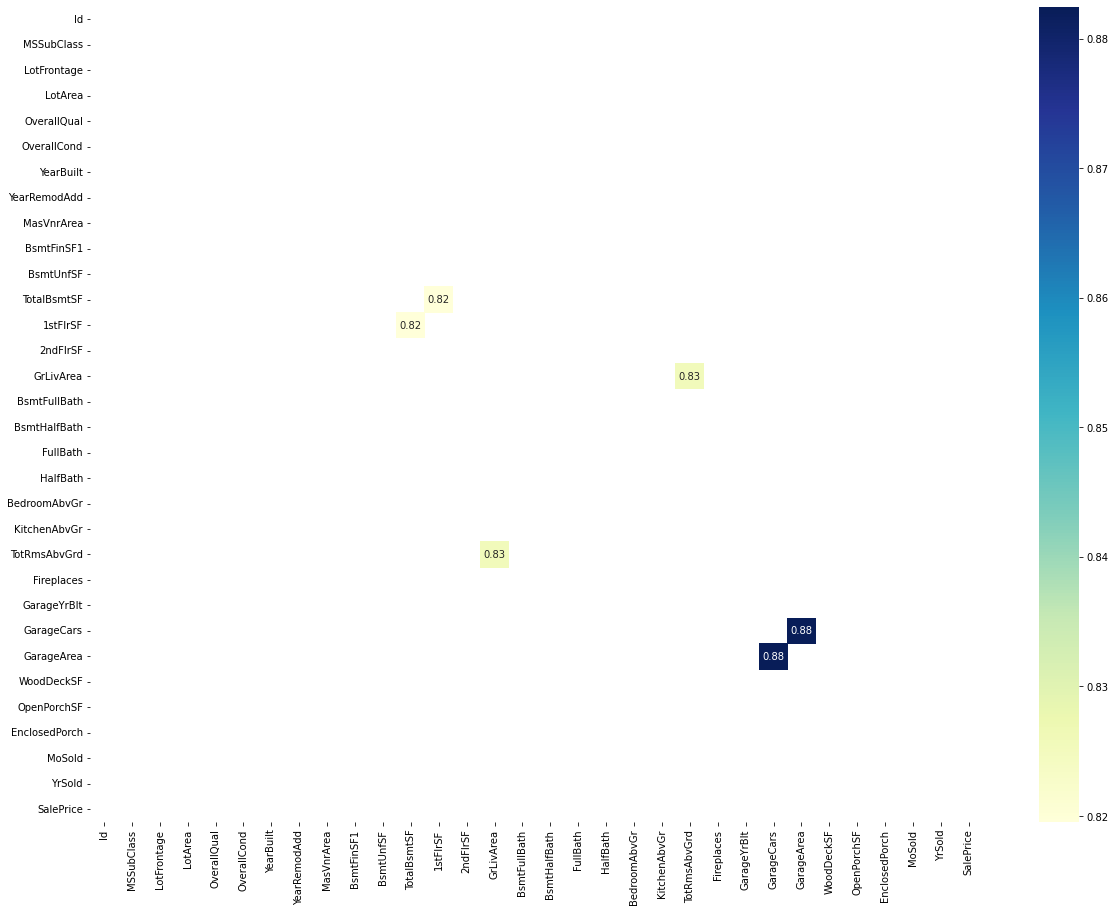

In [1501]:
plt.figure(figsize=(20,15))
df_Corr = df.corr()
df_filtered = df_Corr[((df_corr >= .8) | (df_corr <= -.8)) & (df_Corr != 1.0)]
sns.heatmap(df_filtered, annot = True, cmap = "YlGnBu")
plt.show()

In [1502]:
df.drop( columns = ["GarageArea", "1stFlrSF", "GrLivArea"], inplace = True, axis = 1)

# Dropping highly correlated columns for making a better model


Now we will focus on label encoding for ordinal features

Below lebals are pertaining the a segment where we have seen quality tagging basis - {'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

In [1503]:
df["ExterCond"] = df["ExterCond"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df["ExterQual"] = df["ExterQual"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df["BsmtQual"] = df["BsmtQual"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df["HeatingQC"] = df["HeatingQC"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df["KitchenQual"] = df["KitchenQual"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df["FireplaceQu"] = df["FireplaceQu"].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [1504]:
df["BsmtExposure"] = df["BsmtExposure"].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df["BsmtFinType1"] = df["BsmtFinType1"].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df["BsmtFinType2"] = df["BsmtFinType2"].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})

In [1505]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,3.39589,3.083562,3.489041,1.630137,3.545890,443.639726,1.247260,567.240411,1057.429452,4.145205,346.992466,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,3.511644,6.517808,0.613014,1.825342,1868.739726,1.767123,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,0.57428,0.351054,0.876478,1.067391,2.107776,456.098091,0.892332,441.866955,438.705324,0.959501,436.528436,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.663760,1.625393,0.644666,1.810877,453.697295,0.747315,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,3.00000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,223.000000,795.750000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1958.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,3.00000,3.000000,4.000000,1.000000,4.000000,383.500000,1.000000,477.500000,991.500000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,1.000000,2.000000,1977.000000,2.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,4.00000,3.000000,4.000000,2.000000,6.000000,712.250000,1.000000,808.000000,1298.250000,5.000000,728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,4.000000,7.000000,1.000000,4.000000,2001.000000,2.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5.00000,5.000000,5.000000,4.000000,6.000000,5644.000000,6.000000,2336.000000,6110.000000,5.000000,2065.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,5.000000,14.000000,3.000000,5.000000,2010.000000,4.000000,857.000000,547.000000,552.000000,12.000000,2010.000000,755000.000000


In [1506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  HouseStyle     1460 non-null   object 
 11  OverallQual    1460 non-null   int64  
 12  OverallCond    1460 non-null   int64  
 13  YearBuilt      1460 non-null   int64  
 14  YearRemodAdd   1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  Exterior1st    1460 non-null   object 
 17  Exterior2nd    1460 non-null   object 
 18  MasVnrTy

Let's split Categorical and Numerical features for further analysis

In [1507]:
categorical_col = [col for col in df.columns if df[col].dtype == "object"]
numerical_col = df.columns.drop(categorical_col)

In [1508]:
categorical_col

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Functional',
 'GarageType',
 'GarageFinish',
 'Fence',
 'SaleType',
 'SaleCondition']

In [1509]:
numerical_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

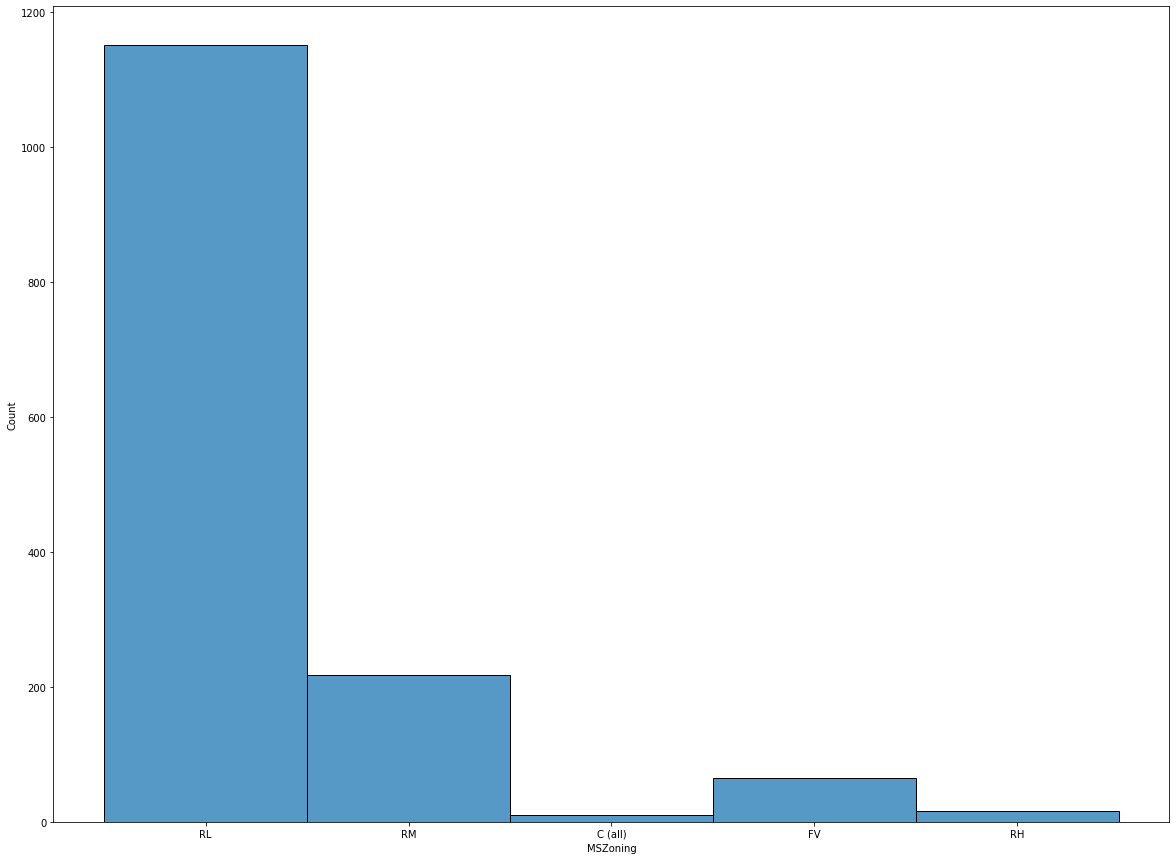

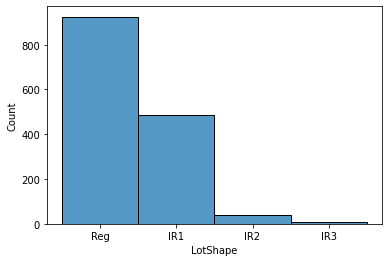

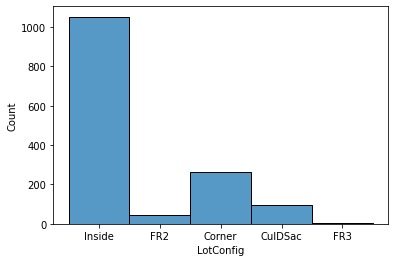

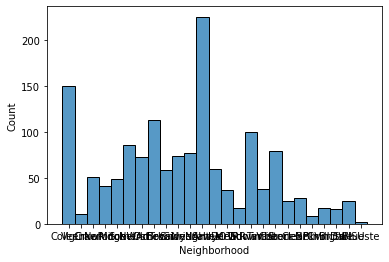

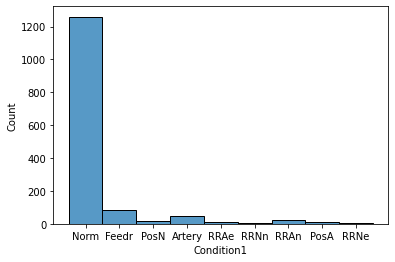

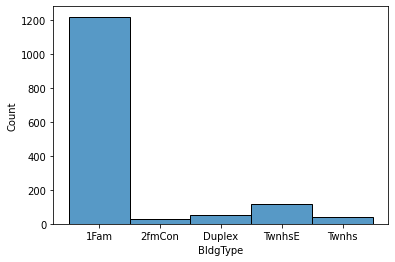

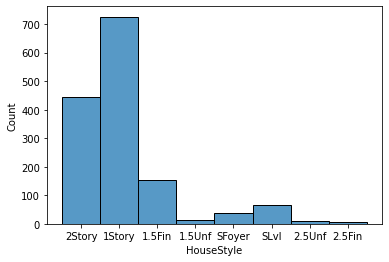

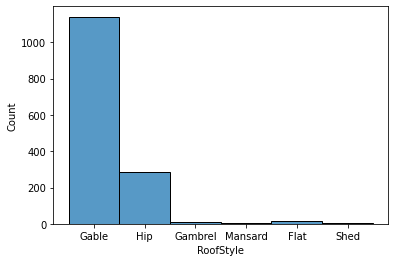

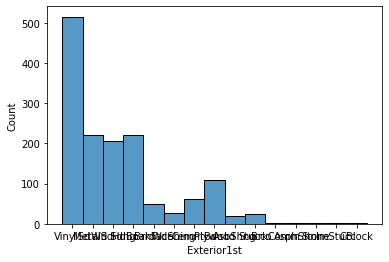

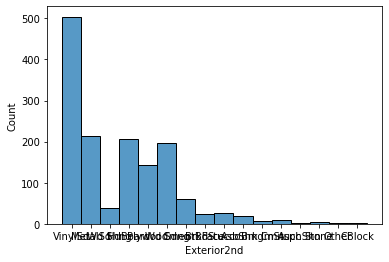

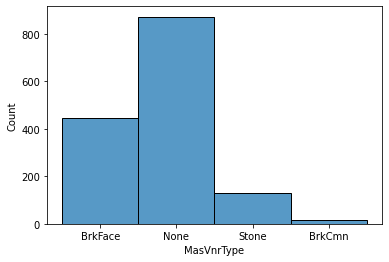

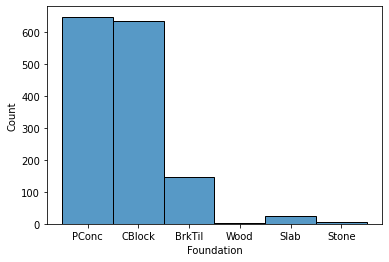

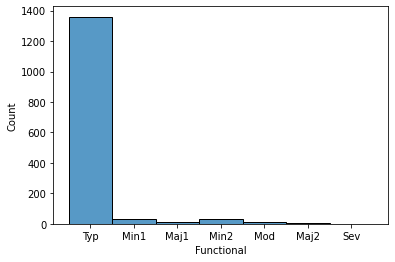

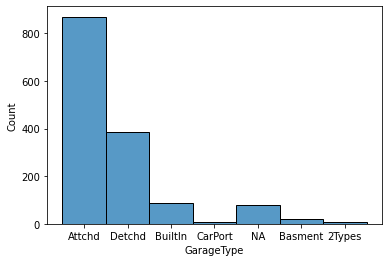

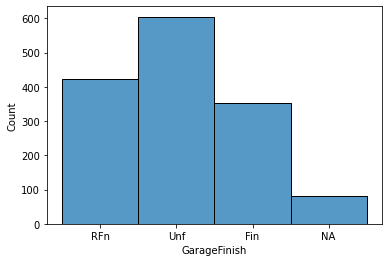

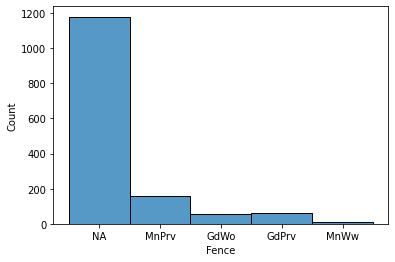

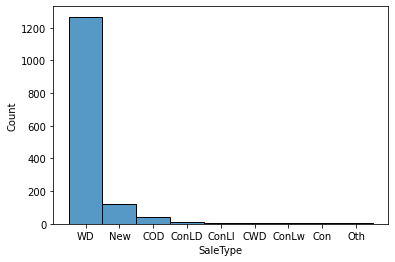

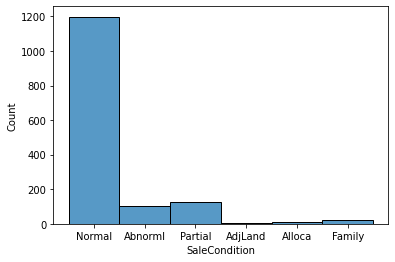

In [1510]:
plt.figure(figsize = (20,15))
for i in categorical_col:
  sns.histplot(df[i])
  plt.show()

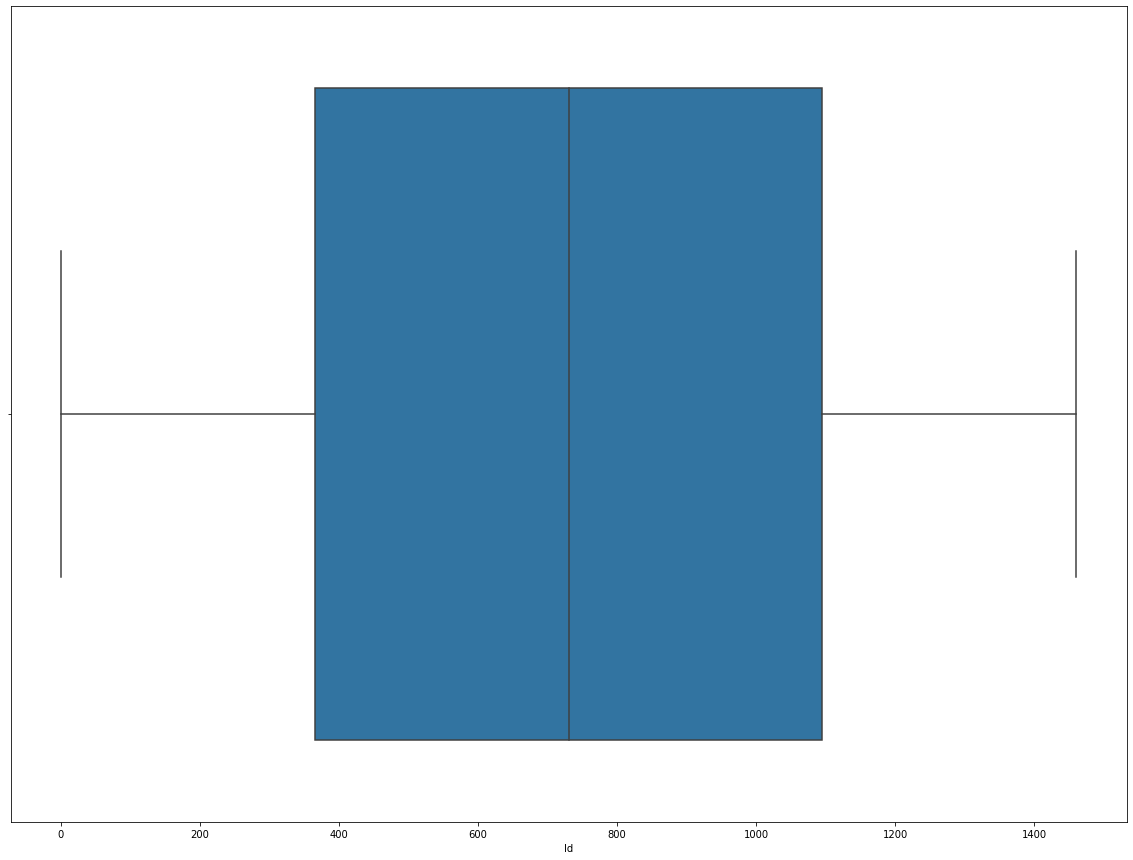

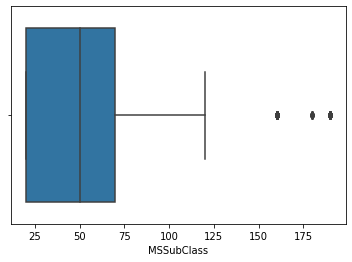

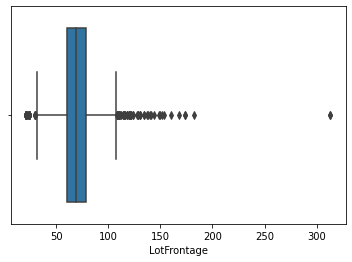

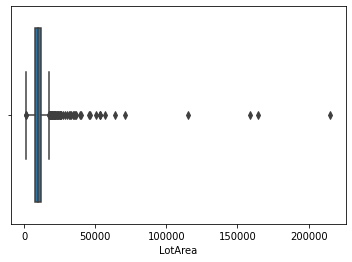

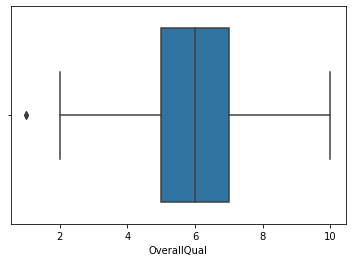

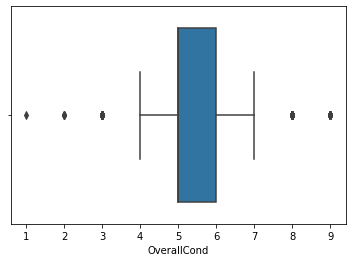

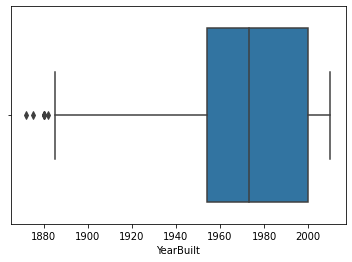

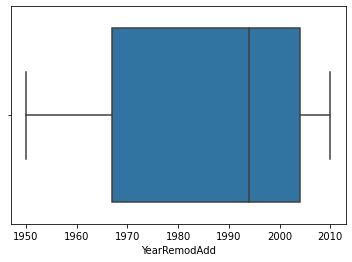

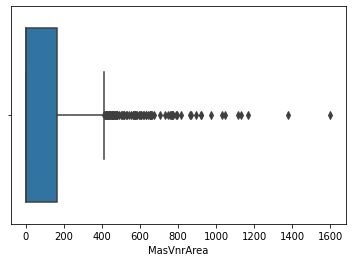

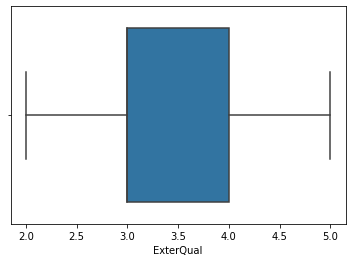

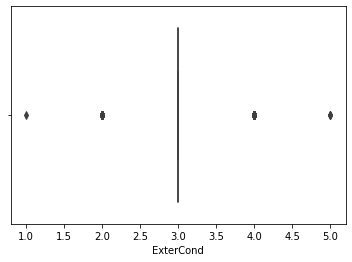

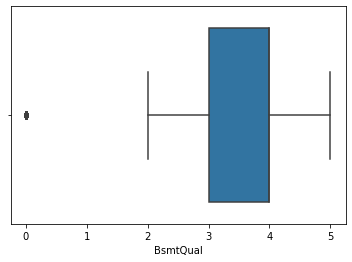

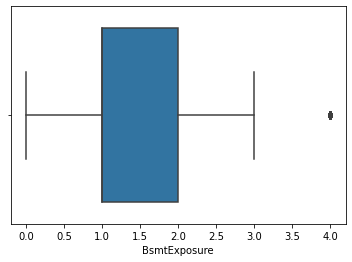

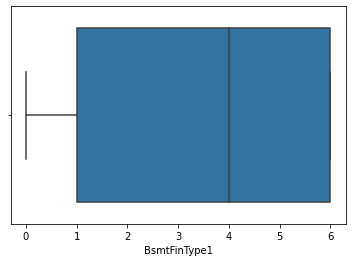

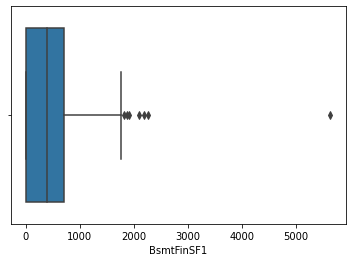

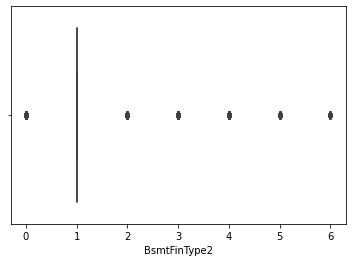

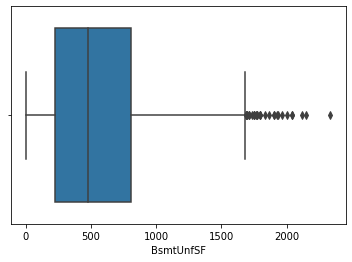

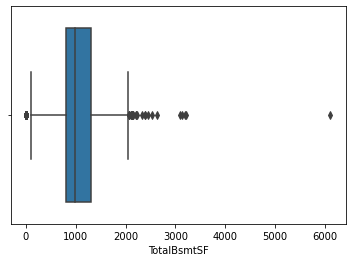

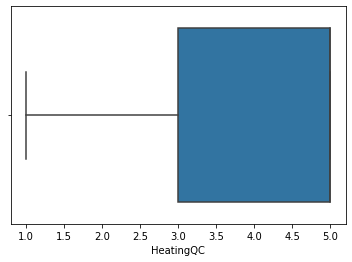

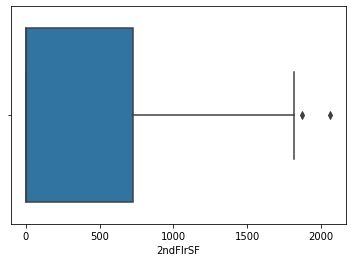

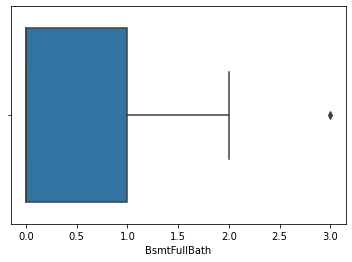

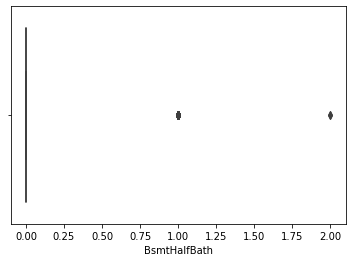

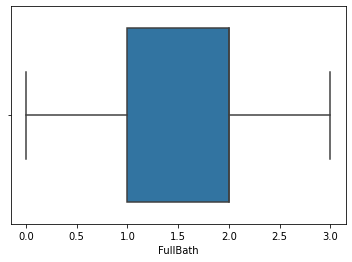

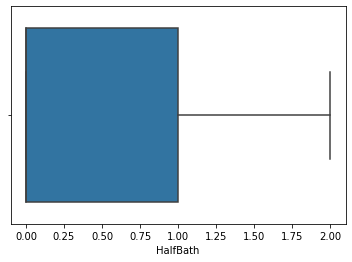

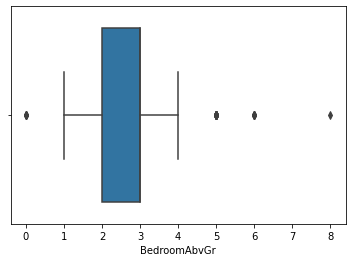

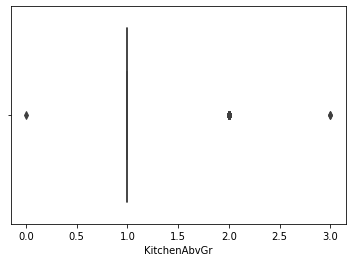

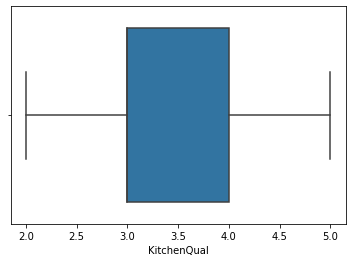

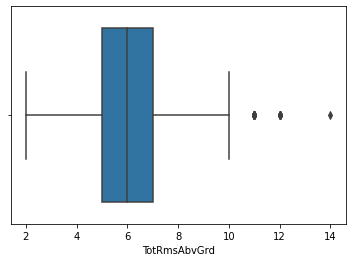

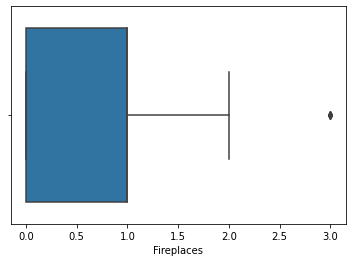

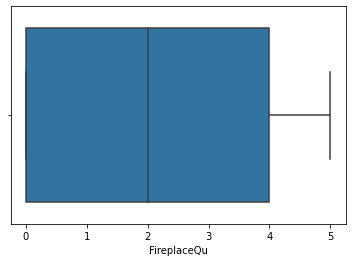

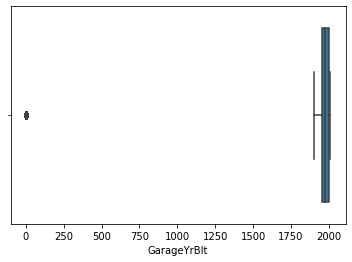

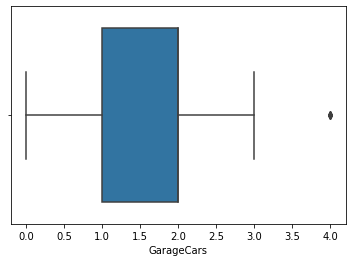

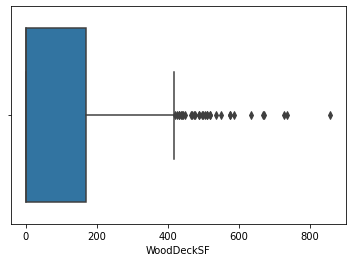

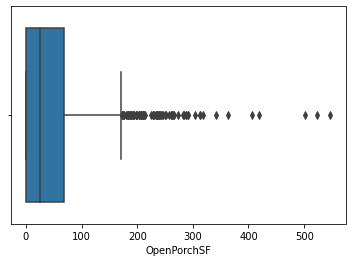

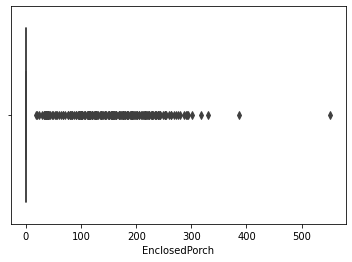

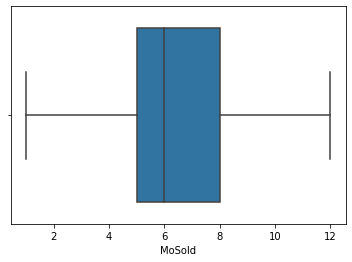

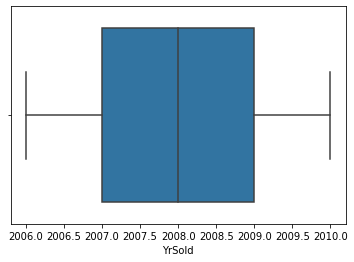

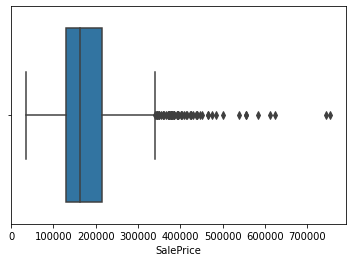

In [1511]:
plt.figure(figsize = (20,15))
for i in numerical_col:
  sns.boxplot(df[i])
  plt.show()

In [1512]:
dummy_col = pd.get_dummies(df[categorical_col], drop_first = True)
dummy_col

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Add remove categorical variable code here

In [1513]:
df.shape

(1460, 56)

In [1514]:
df_final = pd.concat([df, dummy_col], axis = 1)

In [1515]:
df_final.drop(columns = categorical_col, axis = 1, inplace = True)

In [1516]:
df_final.shape

(1460, 166)

Lets start building the model

In [1517]:
X = df_final.drop(columns = "SalePrice")
y = df_final["SalePrice"]

In [1518]:
X.shape

(1460, 165)

In [1519]:
y.shape

(1460,)

Creating Train and Test Split for the data

In [1520]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)

In [1521]:
numerical_col = numerical_col.drop("SalePrice")

In [1522]:
numerical_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '2ndFlrSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold'],
      dtype='object')

Scaling all the numeric variables

In [1523]:
pd.set_option('display.max_columns', None)

In [1524]:
scale = MinMaxScaler()
X_train[numerical_col] = scale.fit_transform(X_train[numerical_col])
X_train[numerical_col].head(10)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold
318,0.217958,0.235294,0.236301,0.039403,0.666667,0.500,0.876812,0.716667,0.1600,0.666667,0.333333,0.8,1.00,1.000000,0.174876,0.166667,0.154110,0.220458,1.00,0.616949,0.333333,0.0,0.666667,0.5,0.500,0.0,0.666667,0.545455,0.333333,0.6,0.991542,0.75,0.396733,0.114723,0.260870,0.272727,0.75
239,0.163811,0.176471,0.106164,0.033981,0.555556,0.375,0.528986,0.000000,0.0000,0.333333,0.333333,0.6,0.25,0.333333,0.016655,0.166667,0.274401,0.120295,0.50,0.333656,0.000000,0.0,0.333333,0.5,0.375,0.0,0.333333,0.363636,0.333333,0.8,0.969652,0.25,0.000000,0.267686,0.000000,0.272727,1.00
986,0.675805,0.176471,0.130137,0.017931,0.555556,0.875,0.275362,0.883333,0.0000,0.333333,0.666667,0.6,0.25,0.166667,0.000000,0.166667,0.207620,0.079378,0.75,0.307022,0.000000,0.0,0.333333,0.0,0.250,0.0,0.666667,0.181818,0.000000,0.0,0.970149,0.25,0.459743,0.000000,0.000000,0.454545,0.00
1416,0.970528,1.000000,0.133562,0.046139,0.333333,0.625,0.094203,0.000000,0.0000,0.333333,0.333333,0.6,0.25,0.166667,0.000000,0.166667,0.332620,0.127169,0.75,0.505569,0.000000,0.0,0.666667,0.0,0.500,0.5,0.333333,0.727273,0.000000,0.0,0.980597,0.50,0.000000,0.000000,0.206522,0.272727,1.00
390,0.267306,0.176471,0.099315,0.032409,0.444444,0.875,0.202899,0.000000,0.0000,0.333333,0.333333,0.6,0.25,0.500000,0.042700,0.666667,0.098031,0.140917,1.00,0.196610,0.333333,0.0,0.333333,0.0,0.500,0.0,0.333333,0.363636,0.000000,0.0,0.984080,0.25,0.000000,0.248566,0.202899,0.272727,0.50
1005,0.688828,0.352941,0.150685,0.032315,0.444444,0.875,0.760870,0.450000,0.1375,0.666667,0.333333,0.8,0.75,1.000000,0.105422,0.166667,0.166952,0.161211,0.50,0.000000,0.000000,0.0,0.666667,0.0,0.375,0.0,0.333333,0.272727,0.000000,0.0,0.983582,0.25,0.245041,0.000000,0.000000,0.909091,0.50
568,0.389308,0.176471,0.198630,0.050756,0.777778,0.875,0.804348,0.983333,0.0000,0.666667,0.333333,0.8,1.00,1.000000,0.255315,0.166667,0.023545,0.244845,1.00,0.307990,0.333333,0.0,0.333333,0.5,0.125,0.0,0.666667,0.181818,0.333333,0.8,0.986567,0.50,0.407235,0.076482,0.000000,0.727273,0.75
342,0.234407,0.411765,0.164384,0.033059,0.222222,0.375,0.557971,0.000000,0.2125,0.333333,0.333333,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.0,0.666667,0.0,0.250,0.5,0.333333,0.272727,0.000000,0.0,0.969652,0.50,0.000000,0.000000,0.000000,0.363636,0.00
114,0.078136,0.294118,0.136986,0.027048,0.555556,0.875,0.528986,0.866667,0.0000,0.333333,0.333333,0.6,0.25,0.833333,0.137137,0.333333,0.044521,0.168249,1.00,0.428087,0.333333,0.0,0.666667,0.5,0.375,0.0,0.666667,0.545455,0.333333,0.6,0.967662,0.25,0.261377,0.000000,0.000000,0.545455,0.25
499,0.342015,0.000000,0.167808,0.028339,0.444444,0.750,0.623188,0.583333,0.0000,0.333333,0.333333,0.6,0.25,0.666667,0.019667,0.333333,0.223459,0.149264,0.25,0.000000,0.000000,0.5,0.333333,0.0,0.250,0.0,0.333333,0.181818,0.000000,0.0,0.974129,0.25,0.014002,0.544933,0.000000,0.454545,0.25


In [1525]:
X.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,3,4,1,6,706,1,150,856,5,854,1,0,2,1,3,1,4,8,0,0,2003.0,2,0,61,0,2,2008,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,3,4,4,5,978,1,284,1262,5,0,0,1,2,0,3,1,3,6,1,3,1976.0,2,298,0,0,5,2007,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,3,4,2,6,486,1,434,920,5,866,1,0,2,1,3,1,4,6,1,3,2001.0,2,0,42,0,9,2008,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,3,3,1,5,216,1,540,756,4,756,1,0,1,0,3,1,4,7,1,4,1998.0,3,0,35,272,2,2006,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0

Lets try to perform a linear regression and check for the basic model as to how it performs.

We will also perform an RFE and VIF as well to check on multicollinearity and subsequenlty remove the unwanted features from the model.

In [1526]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 318 to 792
Columns: 165 entries, Id to SaleCondition_Partial
dtypes: float64(37), uint8(128)
memory usage: 430.7 KB


In [1527]:
# Lets add a constant columns before proceeding with the model.
X_train_sm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_sm.astype(float))

lr_model_1 = lr_1.fit()

lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     37.81
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.65e-300
Time:                        15:26:48   Log-Likelihood:                -11900.
No. Observations:                1021   AIC:                         2.412e+04
Df Residuals:                     860   BIC:                         2.492e+04
Df Model:                         160                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -9.864e+04   1.73e+05     -0.571      0.568   -4.38e+05    2.41e+05
Id                    -1532.2383   3549.704     -0.432      0.666   -8499.336    5434.860
MSSubClass            -1.463e+04   2.19e+04     -0.667      0.505   -5.77e+04    2.84e+04
LotFrontage           -3.561e+04   1.97e+04     -1.812      0.070   -7.42e+04    2961.378
LotArea                1.044e+05   2.69e+04      3.890      0.000    5.17e+04    1.57e+05
OverallQual             1.06e+05    1.4e+04      7.546      0.000    7.84e+04    1.34e+05
OverallCond            3.075e+04   1.08e+04      2.849      0.004    9561.132    5.19e+04
YearBuilt             -6433.3701   1.56e+04     -0.413      0.680    -3.7e+04    2.41e+04
YearRemodAdd           3853.4199   5104.459      0.755      0.451   -6165.235    1.39e+04
MasVnrArea             3.109e+04   1.35e+04      2.299      0.022    4547.706    5.76e+04
ExterQual              1.489e+04      1e+04      1.483      0.138   -4818.720    3.46e+04
ExterCond             -1.125e+04   9815.379     -1.146      0.252   -3.05e+04    8013.037
BsmtQual               1.847e+04   1.17e+04      1.573      0.116   -4582.264    4.15e+04
BsmtExposure           3.118e+04   5188.029      6.010      0.000     2.1e+04    4.14e+04
BsmtFinType1           6522.5235   4678.796      1.394      0.164   -2660.673    1.57e+04
BsmtFinSF1            -2028.1827   5.99e+04     -0.034      0.973    -1.2e+05    1.16e+05
BsmtFinType2          -9626.1713   1.14e+04     -0.843      0.399    -3.2e+04    1.28e+04
BsmtUnfSF             -1.158e+04   2.45e+04     -0.472      0.637   -5.97e+04    3.66e+04
TotalBsmtSF            1.402e+05   6.75e+04      2.079      0.038    7857.853    2.73e+05
HeatingQC              3270.8922   5819.135      0.562      0.574   -8150.477    1.47e+04
2ndFlrSF               1.374e+05   1.69e+04      8.107      0.000    1.04e+05    1.71e+05
BsmtFullBath           2.528e+04   8915.671      2.835      0.005    7779.578    4.28e+04
BsmtHalfBath           1.115e+04   9358.021      1.191      0.234   -7220.951    2.95e+04
FullBath               3.259e+04   9976.215      3.266      0.001     1.3e+04    5.22e+04
HalfBath               1.052e+04   6685.151      1.574      0.116   -2600.914    2.36e+04
BedroomAbvGr          -2.696e+04   1.73e+04     -1.561      0.119   -6.09e+04    6947.489
KitchenAbvGr          -2.181e+04   1.82e+04     -1.197      0.232   -5.76e+04     1.4e+04
KitchenQual            2.534e+04   7808.630      3.245      0.001       1e+04    4.07e+04
TotRmsAbvGrd           5.466e+04   1.57e+04      3.483      0.001    2.39e+04    8.55e+04
Fireplaces             1.194e+04   1.04e+04      1.149      0.251   -8446.880    3.23e+04
FireplaceQu            3838.8950   6309.186      0.608      0.543   -8544.310    1.62e+04
GarageYrBlt           -

In [1528]:
vif=pd.DataFrame()
vif['features']=X_train.columns
vif['vif']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif.head(50)


,features,vif
164,SaleCondition_Partial,inf
110,Exterior2nd_AsphShn,inf
144,GarageType_NA,inf
145,GarageFinish_NA,inf
157,SaleType_New,inf
113,Exterior2nd_CBlock,inf
99,Exterior1st_CBlock,inf
96,Exterior1st_AsphShn,inf
30,GarageYrBlt,1807.00
139,GarageType_Attchd,288.06


Lets try the RFE Method to check on which are the most suitable features

In [1529]:
lr_2=LinearRegression()

rfe=RFE(lr_2,n_features_to_select=80)
rfe_model_2=rfe.fit(X_train,y_train)           
print(rfe_model_2.ranking_)

[67  1  1  1  1  1 56 52  1  1  1  1  1  4 69 35  1  1 59  1  1  1  1 32
  1  1  1  1  1 47 13  1  1 64 41 45 57  1  1  1  1 65  1 62  1  1  1 63
  5  1  1 30 40  1 71 39 48  1 53 42  1 50  1  1 46  1 34 18  1  1 58  1
 60  1  1 49 37  1 86 83 74 84  1  1  1  1  1  1  1 81 17 85 27 44 82 31
  1 75  1  1  1  8  1 29 10 73 33 68 23 79  1 36 25  1  1  9  1 28  1 11
 20  1 54 24  1 80 55  1  1  1  1  1  1 43 38 66  1  1 78 16 12 77 14 15
  1  1  2  3 26 21 19 22  1  1  1 70 61  1  6  7  1 76 72 51  1]


In [1530]:
RFE_Columns = X_train.columns[rfe_model_2.support_]


In [1531]:
print(RFE_Columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_RRAn', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'Hous

In [1532]:
RFE_Col_new = ['LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea','BsmtExposure',
       'TotalBsmtSF', '2ndFlrSF', 'BsmtFullBath', 
       'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_PosA', 'Condition1_RRAn', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story',
       'Exterior1st_AsphShn', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior2nd_AsphShn',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Exterior2nd_Wd Shng',
       'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'Functional_Mod', 'Functional_Sev', 'GarageType_NA', 'GarageFinish_NA',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New',
       'SaleCondition_AdjLand', 'SaleCondition_Partial']


In [1533]:
X_train_rfe = X_train[RFE_Col_new]

In [1534]:
X_train_sm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_sm.astype(float))

lr_model_1 = lr_1.fit()

lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     87.53
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        15:27:00   Log-Likelihood:                -11952.
No. Observations:                1021   AIC:                         2.404e+04
Df Residuals:                     952   BIC:                         2.438e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.019e+05   1.46e+04     -6.967      0.000   -1.31e+05   -7.32e+04
LotArea                8.293e+04   2.36e+04      3.517      0.000    3.67e+04    1.29e+05
OverallQual            1.196e+05    1.2e+04     10.000      0.000    9.61e+04    1.43e+05
OverallCond             3.41e+04   8404.866      4.058      0.000    1.76e+04    5.06e+04
MasVnrArea             3.147e+04   1.03e+04      3.065      0.002    1.13e+04    5.16e+04
BsmtExposure            3.21e+04   4523.601      7.097      0.000    2.32e+04     4.1e+04
TotalBsmtSF            1.359e+05   2.38e+04      5.705      0.000    8.92e+04    1.83e+05
2ndFlrSF               1.299e+05    1.3e+04     10.005      0.000    1.04e+05    1.55e+05
BsmtFullBath           3.615e+04   6344.853      5.697      0.000    2.37e+04    4.86e+04
FullBath               2.893e+04   7992.465      3.620      0.000    1.32e+04    4.46e+04
BedroomAbvGr          -4.344e+04   1.52e+04     -2.859      0.004   -7.33e+04   -1.36e+04
KitchenAbvGr           -4.41e+04   1.08e+04     -4.089      0.000   -6.53e+04   -2.29e+04
KitchenQual            3.199e+04   6709.787      4.768      0.000    1.88e+04    4.52e+04
TotRmsAbvGrd           5.837e+04   1.39e+04      4.204      0.000    3.11e+04    8.56e+04
Fireplaces             1.943e+04   5674.111      3.425      0.001    8297.162    3.06e+04
GarageCars             5.827e+04   8980.370      6.489      0.000    4.06e+04    7.59e+04
WoodDeckSF              1.47e+04   7390.935      1.989      0.047     195.058    2.92e+04
MSZoning_FV            1.838e+04   1.57e+04      1.171      0.242   -1.24e+04    4.92e+04
MSZoning_RH             2.86e+04   1.51e+04      1.892      0.059   -1058.043    5.83e+04
MSZoning_RL            2.324e+04   1.22e+04      1.912      0.056    -618.401    4.71e+04
MSZoning_RM            2.028e+04   1.24e+04      1.634      0.103   -4074.094    4.46e+04
LotShape_IR3          -2.975e+04   1.11e+04     -2.672      0.008   -5.16e+04   -7897.389
LotConfig_CulDSac      1.161e+04   4096.061      2.833      0.005    3567.223    1.96e+04
LotConfig_FR2         -7677.2180   5790.550     -1.326      0.185    -1.9e+04    3686.499
LotConfig_FR3         -1.554e+04   1.81e+04     -0.857      0.392   -5.11e+04       2e+04
Neighborhood_BrDale    1.478e+04   1.16e+04      1.278      0.202   -7922.839    3.75e+04
Neighborhood_BrkSide   8008.3689   5646.136      1.418      0.156   -3071.942    1.91e+04
Neighborhood_Crawfor   3.171e+04   5921.606      5.355      0.000    2.01e+04    4.33e+04
Neighborhood_MeadowV   1.616e+04   1.33e+04      1.214      0.225   -9967.993    4.23e+04
Neighborhood_NPkVill   9736.3645   1.35e+04      0.722      0.470   -1.67e+04    3.62e+04
Neighborhood_NoRidge   5.525e+04   6351.249      8.699      0.000    4.28e+04    6.77e+04
Neighborhood_NridgHt   

In [1535]:
vif=pd.DataFrame()
vif['features']=X_train_rfe.columns
vif['vif']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['vif']=round(vif['vif'],2)
vif=vif.sort_values(by='vif',ascending=False)
vif

,features,vif
72,SaleCondition_Partial,inf
66,GarageFinish_NA,inf
50,Exterior2nd_AsphShn,inf
47,Exterior1st_CBlock,inf
45,Exterior1st_AsphShn,inf
...,...,...
69,SaleType_ConLD,1.07
62,Foundation_Wood,1.06
67,SaleType_CWD,1.06
64,Functional_Sev,1.02


We have randomly removed columns from the RFE data by refering to P-Value. We will proceed further with the same RFE Columns data and see how to the model performs.

In [1536]:
y_train_pred = lr_model_1.predict(X_train_sm)

# r2 Score 

print(r2_score(y_true = y_test, y_pred = y_test_pred))

-273445883.21979576


In [1537]:
res = y_train - y_train_pred

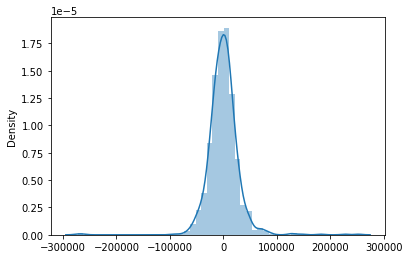

In [1538]:
sns.distplot(res)
plt.show()

In [1539]:
X_test_new = X_test[RFE_Col_new]

X_test_new_sm = sm.add_constant(X_test_new)

In [1540]:
y_test_pred = lr_model_1.predict(X_test_new_sm)

# r2 Score 

print(r2_score(y_true = y_test, y_pred = y_test_pred))

-273445883.21979576


In [1541]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 1326686754.2058134


There are lot of features and its evident that we see clear multicoliinearity while checking VIF and the p-values for many features are not in the permissible range. It would be difficult for us to model in this fashion, so we will explore further and see how we can realise the model parameters.

Ridge Model

In [1542]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param = {'alpha' : [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,50,100,250,500,750,1000]}

model_re = Ridge()
model_cv = GridSearchCV(estimator = model_re,
                        param_grid = param,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_train,y_train)

score = model_cv.best_score_
hyperparameters = model_cv.best_params_

print("score = ",score , "hyperparameters = ", hyperparameters )

Fitting 5 folds for each of 27 candidates, totalling 135 fits
score =  -20861.291076011454 hyperparameters =  {'alpha': 7.0}


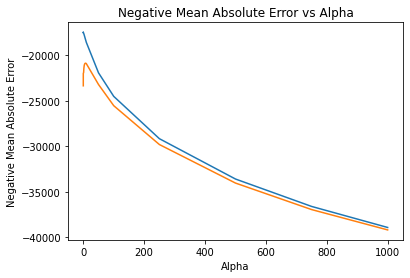

In [1543]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_result = cv_results[cv_results['param_alpha']<=10]
cv_results['param_alpha'] =  cv_results['param_alpha'].astype('int')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel("Negative Mean Absolute Error")
plt.title("Negative Mean Absolute Error vs Alpha")
plt.show()

In [1544]:
ridge_model = Ridge(alpha = 7.0)
ridge_model.fit(X_train, y_train)
ridge_model.coef_ 

array([ -3111.20847581, -20236.59854907,   6717.64347023,  20974.31410418,
        68857.53962857,  18326.42950845,   2062.76296151,   8589.00213355,
        31265.53329183,  24454.86725749,  -1922.19747554,  18123.12169187,
        33472.11883352,  11099.56284038,  23799.60019942,   1633.38318196,
         8227.56547925,  27515.34795478,   3631.23792476,  57643.33738044,
        22623.85512133,   3362.48985885,  35816.15662349,  14723.99476092,
         3865.49473258,  -5699.18628158,  30716.66224024,  42160.79576993,
        15429.87335544,  10855.15896494,   -517.85946985,  42637.58649443,
        15370.64708921,   6622.10133141,   1810.84734836,  -3476.13428431,
        -3177.34970811,   2994.77855471,   6435.38339091,   7216.42472342,
         2773.52517165,   4928.54878816,  -8955.9860327 ,    119.13760825,
        11849.19776561, -12004.14029631,  -6120.83469831,   -987.41743807,
         -832.87828658,   2195.83984629,    762.04315868,   2456.45118884,
       -10533.65473847,  

Co-efficients are not Zero but should have been close to Zero

In [1545]:
y_train_pred = ridge_model.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

0.8575419683912754


In [1546]:
X_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=165)

In [1547]:
X_test = X_test[X_train.columns]
y_test_pred = ridge_model.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

-20672731.302644


There is a huge difference between test and train outputs for the model.

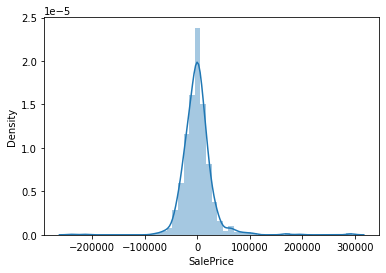

In [1549]:
res_train = y_train - y_train_pred
sns.distplot(res_train)
plt.show()

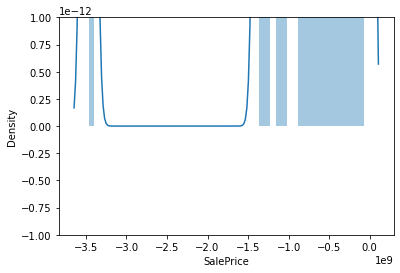

In [1550]:
res_test = y_test - y_test_pred
sns.distplot(res_test)
plt.show()

Error terms are not commonly distributed, so there should be some anomaly

In [1551]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 364780519.976108


In [1560]:
model_parameters = list(ridge_model.coef_ )
model_parameters.insert(0, ridge_model.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X_train.columns  
cols = cols.insert(0, "constant")
mod = list(zip(cols, model_parameters))
features = pd.DataFrame(mod)
features.columns = ['Variable', 'Coeff']
features = features.sort_values((['Coeff']), axis = 0, ascending = False)
features.head()

,Variable,Coeff
5,OverallQual,68857.54
20,2ndFlrSF,57643.34
63,Neighborhood_NoRidge,44952.46
32,GarageCars,42637.59
28,TotRmsAbvGrd,42160.80


Lasso Method

In [1553]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param = {'alpha' : [0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10,50,100,250,500,750,1000]}

model_la = Lasso()
model_cv = GridSearchCV(estimator = model_la,
                        param_grid = param,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_train,y_train)

score = model_cv.best_score_
hyperparameters = model_cv.best_params_

print("score = ",score , "hyperparameters = ", hyperparameters )

Fitting 5 folds for each of 27 candidates, totalling 135 fits
score =  -21004.639552094362 hyperparameters =  {'alpha': 100}


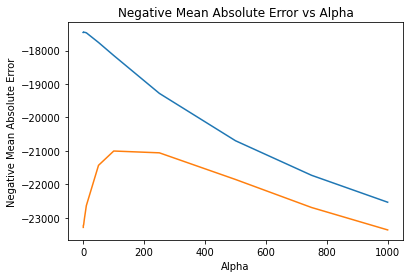

In [1554]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_result = cv_results[cv_results['param_alpha']<=10]
cv_results['param_alpha'] =  cv_results['param_alpha'].astype('int')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel("Negative Mean Absolute Error")
plt.title("Negative Mean Absolute Error vs Alpha")
plt.show()

In [1555]:
lasso_model = Lasso(alpha = 100.0)
lasso_model.fit(X_train, y_train)
lasso_model.coef_ 

array([-1.95476516e+03, -2.18705472e+04, -0.00000000e+00,  3.81906414e+04,
        1.16999914e+05,  2.19371839e+04,  0.00000000e+00,  4.40762294e+03,
        3.54108090e+04,  1.55208519e+04, -0.00000000e+00,  6.36338001e+03,
        3.47390435e+04,  1.00120221e+04,  9.43136329e+03, -0.00000000e+00,
        0.00000000e+00,  6.95888618e+04,  7.57505793e+02,  9.60168524e+04,
        2.36469328e+04,  0.00000000e+00,  2.67950377e+04,  9.01526905e+03,
       -0.00000000e+00, -0.00000000e+00,  3.05473423e+04,  4.26089232e+04,
        1.25754389e+04,  6.46436166e+03, -0.00000000e+00,  4.64673130e+04,
        1.23547260e+04,  0.00000000e+00,  0.00000000e+00, -3.05182668e+03,
       -2.28984423e+03,  0.00000000e+00,  0.00000000e+00,  4.02670647e+03,
       -0.00000000e+00,  2.77702870e+03, -7.46473147e+03,  1.75812240e+02,
        1.14941666e+04, -8.73712450e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.53467011e+03,  2.14863529e+03,
       -1.81653784e+03,  

In [1556]:
y_train_pred = lasso_model.predict(X_train)
print(r2_score(y_true = y_train, y_pred = y_train_pred))

X_test = X_test[X_train.columns]
y_test_pred = lasso_model.predict(X_test)
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.8623021512138638
-63221075.74821188


In [1557]:
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_test_pred)))

RMSE : 637916215.3863139


In [1559]:
model_parameters = list(lasso_model.coef_ )
model_parameters.insert(0, lasso_model.intercept_)
model_parameters = [round(x, 2) for x in model_parameters]
cols = X_train.columns  
cols = cols.insert(0, "constant")
mod = list(zip(cols, model_parameters))
features = pd.DataFrame(mod)
features.columns = ['Variable', 'Coeff']
features = features.sort_values((['Coeff']), axis = 0, ascending = False)
features.head()


,Variable,Coeff
5,OverallQual,116999.91
20,2ndFlrSF,96016.85
18,TotalBsmtSF,69588.86
63,Neighborhood_NoRidge,52787.27
32,GarageCars,46467.31


In the current scenario, we are not in a position to recommend which model would be better to the client to the inconsistency in both Ridge and Lasso models - basis test data.

Few of the recommended steps:

1. Feature elemination process to be redone
2. Close look into dependencies or correlations in order to do better feature engineering
3. Prepare the model with better training data 